# Personification Score

- second person singular pronouns (you, yours..)
- first person plural pronouns (we, us..)
- please
- thank you
- thanks
- sorry
- could you
- can you
- can you
- hi
- hello

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../../../giicg.db")

prompts = pd.read_sql("Select * from expanded_prompts", conn).dropna(subset=['conversational'])
prompts


,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en
...,...,...,...,...,...,...,...,...,...,...
755,724,31,user,import pandas as pd\nimport numpy as np\nfrom ...,Please replace my retrieval pipeline here with...,import pandas as pd\nimport numpy as np\nfrom ...,You are tasked with separating user prompts in...,Man (cisgender),92,en
756,726,31,user,"please update my code accordingly, no comments...","please update my code accordingly, no comments...",,,Man (cisgender),92,en
757,1131,54,user,import pandas as pd\nimport numpy as np\nfrom ...,"I want to tune optimal thresholds. Currently, ...",import pandas as pd\nimport numpy as np\nfrom ...,The narratives list looks like this:\nnarrativ...,Man (cisgender),92,en
758,1532,71,user,"from transformers import AutoTokenizer, AutoMo...",I want to use an LLM for listwise reranking in...,"from transformers import AutoTokenizer, AutoMo...",,Man (cisgender),92,en


## Normalization

In [2]:
from helpers.normalization import remove_punctuation_and_newlines, remove_capitalization

prompts['conversational'] = prompts['conversational'].apply(remove_punctuation_and_newlines)
prompts['conversational'] = prompts['conversational'].apply(remove_capitalization)
prompts

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language
0,1,1,user,"parsing data from python iterator, how it coul...",parsing data from python iterator how it could...,,,Man (cisgender),6,en
1,730,32,user,Write python function to do operations with in...,write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,write shortest tutorial on creating rag on ema...,,,Man (cisgender),6,en
3,1135,55,user,what is FAISS,what is faiss,,,Man (cisgender),6,en
4,1137,55,user,Transform given code to process large .mbox file,transform given code to process large mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en
...,...,...,...,...,...,...,...,...,...,...
755,724,31,user,import pandas as pd\nimport numpy as np\nfrom ...,please replace my retrieval pipeline here with...,import pandas as pd\nimport numpy as np\nfrom ...,You are tasked with separating user prompts in...,Man (cisgender),92,en
756,726,31,user,"please update my code accordingly, no comments...",please update my code accordingly no comments ...,,,Man (cisgender),92,en
757,1131,54,user,import pandas as pd\nimport numpy as np\nfrom ...,i want to tune optimal thresholds currently i ...,import pandas as pd\nimport numpy as np\nfrom ...,The narratives list looks like this:\nnarrativ...,Man (cisgender),92,en
758,1532,71,user,"from transformers import AutoTokenizer, AutoMo...",i want to use an llm for listwise reranking in...,"from transformers import AutoTokenizer, AutoMo...",,Man (cisgender),92,en


## Concatenate all prompts per user

In [11]:
user_prompts = (
    prompts.groupby(['user_id', 'gender'])['conversational']
    .apply(' '.join)
    .reset_index()    # Reset index to create a DataFrame
)

user_prompts.columns = ['user_id', 'gender', 'conversational']
user_prompts = user_prompts[user_prompts['gender'].isin(['Woman (cisgender)', 'Man (cisgender)'])].reset_index()

user_prompts

,index,user_id,gender,conversational
0,0,6,Man (cisgender),parsing data from python iterator how it could...
1,1,11,Woman (cisgender),can you adapt the following code so that inste...
2,2,15,Man (cisgender),setalltables action is currently not fetching ...
3,3,16,Woman (cisgender),i want to use dummy hot encoding to replace th...
4,4,25,Man (cisgender),what is the best way to encode and compress a ...
5,5,28,Woman (cisgender),i have a pandas dataframe like this i want to...
6,7,31,Man (cisgender),how can i make use of an observablehqdatabasec...
7,8,34,Man (cisgender),blender and python i have a collection of hund...
8,9,46,Man (cisgender),how to run a python future without blocking ie...
9,10,47,Man (cisgender),can you create photoshop scripts in which form...


## Analysis

In [12]:
import spacy

def load_spacy_lanuage_model() -> spacy.language.Language:
    try:
        return spacy.load("en_core_web_sm")
    except OSError:
        print("Downloading missing model...")
        spacy.cli.download("en_core_web_sm")
        return spacy.load("en_core_web_sm")

def get_sec_per_sg_pronouns(text, spacy_model) -> int:
    second_person_pronouns = {"you", "your", "yours", "yourself", "yourselves"}
    doc = spacy_model(text)
    count = 0
    for token in doc:
        if token.lower_ in second_person_pronouns and token.pos_ == "PRON":
            count += 1
    #print("Second person singular pronoun count:", count)
    return count


def get_first_per_pl_pronouns(text, spacy_model) -> int:
    first_plural_pronouns = {"we", "us", "our", "ours", "ourselves"}
    doc = spacy_model(text)
    count = 0
    for token in doc:
        if token.lower_ in first_plural_pronouns and token.pos_ == "PRON":
            count += 1
    #print("First person plural pronoun count:", count)
    return count

def count_please(text: str) -> int:
    return text.lower().count("please") + text.lower().count("pls") + text.lower().count("plz")


#def count_thank_you(text: str) -> int:
 #   return text.lower().count("thank you")

def count_thanks(text: str) -> int:
    return text.lower().count("thanks")

def count_sorry(text: str) -> int:
    return text.lower().count("sorry")

#def count_would_like(text: str) -> int:
 #   return text.lower().count("would like")

def count_could_you(text: str) -> int:
    return text.lower().count("could you")

def count_can_you(text: str) -> int:
    return text.lower().count("can you")

def count_greetings(text: str) -> int:
    # Match only standalone "hi", not "high", "highlight", etc.
    import re
    hi = len(re.findall(r'\bhi\b', text.lower()))
    hello = len(re.findall(r'\bhello\b', text.lower()))
    hey = len(re.findall(r'\bhey\b', text.lower()))
    return hi + hello + hey

def compute_personification_score(text: str, spacy_model) -> float:
    tokens = spacy_model(text)
    n_sec_pers_sg = get_sec_per_sg_pronouns(text, spacy_model)
    n_f_pers_pl = get_first_per_pl_pronouns(text, spacy_model)
    n_please = count_please(text)
    #n_thank_you = count_thank_you(text)
    n_thanks = count_thanks(text)
    n_sorry = count_sorry(text)
    #n_could_you = count_could_you(text)
    #n_can_you = count_can_you(text)
    n_greets = count_greetings(text)
    score = ((n_sec_pers_sg + n_f_pers_pl + n_please + n_thanks + n_sorry + n_greets)/len(tokens)) * 100
    return score

def extract_single_counts(df):
    modified = df.copy()
    spacy_model = load_spacy_lanuage_model()

    # Pronoun/personification counts
    modified['n_sec_pers_sg'] = modified['conversational'].apply(get_sec_per_sg_pronouns, args=(spacy_model,))
    modified['n_f_pers_pl'] = modified['conversational'].apply(get_first_per_pl_pronouns, args=(spacy_model,))

    # Politeness and greeting expression counts
    modified['n_please']       = modified['conversational'].apply(count_please)
    #modified['n_thank_you']    = modified['conversational'].apply(count_thank_you)
    modified['n_thanks']       = modified['conversational'].apply(count_thanks)
    modified['n_sorry']        = modified['conversational'].apply(count_sorry)
   # modified['n_would_like']   = modified['conversational'].apply(count_would_like)
    #modified['n_could_you']    = modified['conversational'].apply(count_could_you)
    #modified['n_can_you'] = modified['conversational'].apply(count_can_you)
    modified['n_greets']           = modified['conversational'].apply(count_greetings)

    return modified


def get_personification_score(df):
    modified = df.copy()
    spacy_model = load_spacy_lanuage_model()

    modified['personification_score'] = modified['conversational'].apply(compute_personification_score, args=(spacy_model,))
    return modified


#scores = extract_single_counts(prompts)
scores = extract_single_counts(user_prompts)
scores = get_personification_score(scores)

In [13]:
scores

,index,user_id,gender,conversational,n_sec_pers_sg,n_f_pers_pl,n_please,n_thanks,n_sorry,n_greets,personification_score
0,0,6,Man (cisgender),parsing data from python iterator how it could...,0,4,0,0,0,0,1.990050
1,1,11,Woman (cisgender),can you adapt the following code so that inste...,8,0,0,0,0,0,4.123711
2,2,15,Man (cisgender),setalltables action is currently not fetching ...,0,0,0,0,0,0,0.000000
3,3,16,Woman (cisgender),i want to use dummy hot encoding to replace th...,4,0,4,0,0,0,1.459854
4,4,25,Man (cisgender),what is the best way to encode and compress a ...,0,0,0,0,0,0,0.000000
5,5,28,Woman (cisgender),i have a pandas dataframe like this i want to...,8,2,4,4,0,1,3.339192
6,7,31,Man (cisgender),how can i make use of an observablehqdatabasec...,0,0,0,0,0,0,0.000000
7,8,34,Man (cisgender),blender and python i have a collection of hund...,11,3,5,0,1,0,1.511716
8,9,46,Man (cisgender),how to run a python future without blocking ie...,0,0,0,0,0,0,0.000000
9,10,47,Man (cisgender),can you create photoshop scripts in which form...,11,16,4,0,0,0,3.421634


/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_16867/4251807126.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


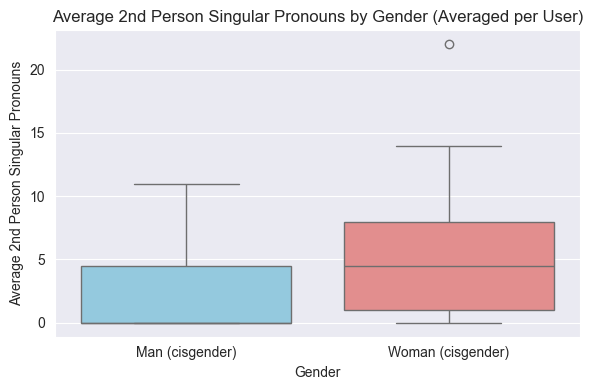

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_16867/4251807126.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


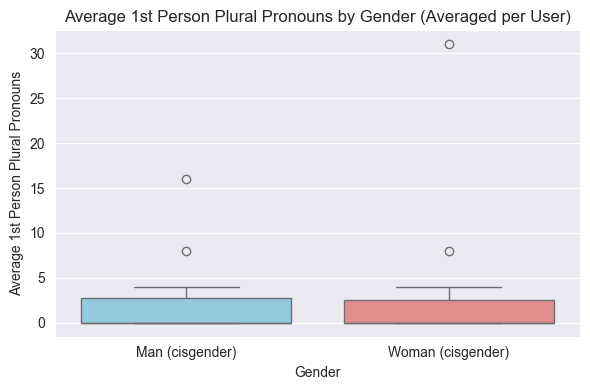

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_16867/4251807126.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


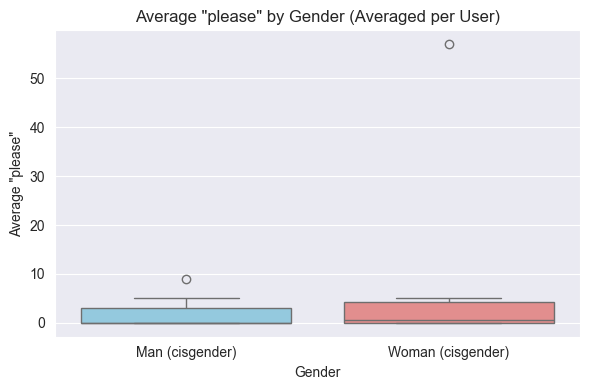

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_16867/4251807126.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


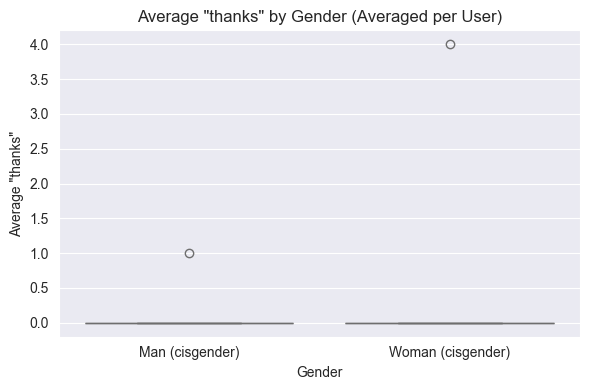

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_16867/4251807126.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


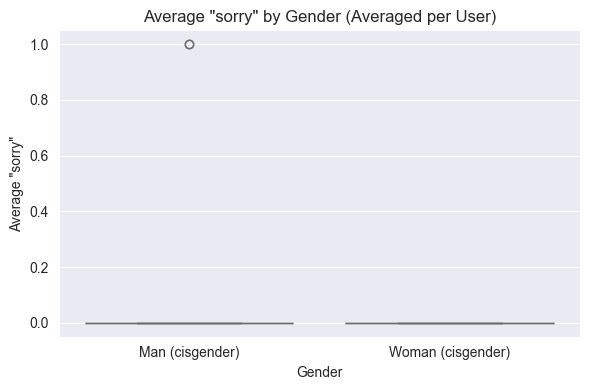

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_16867/4251807126.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


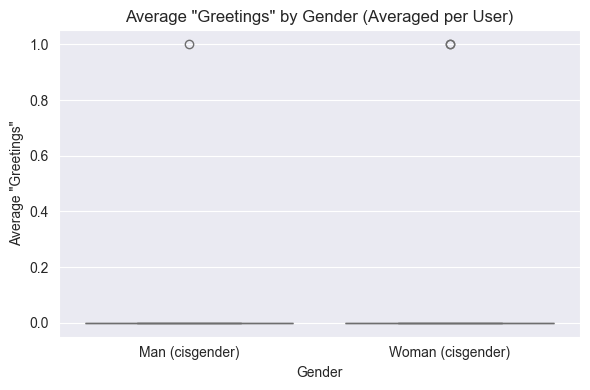

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_16867/4251807126.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


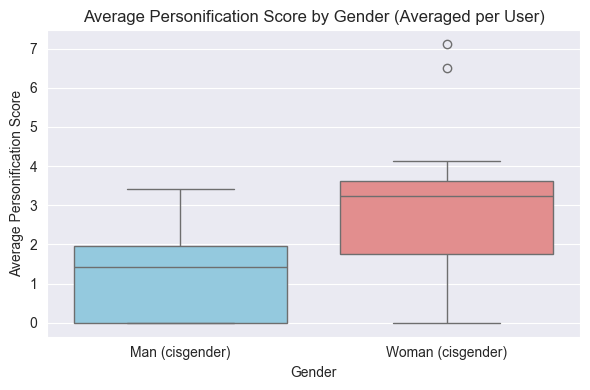

,user_id,gender,n_sec_pers_sg,n_f_pers_pl,n_please,n_thanks,n_sorry,n_greets,personification_score
0,6,Man (cisgender),0.0,4.0,0.0,0.0,0.0,0.0,1.990050
1,11,Woman (cisgender),8.0,0.0,0.0,0.0,0.0,0.0,4.123711
2,15,Man (cisgender),0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,16,Woman (cisgender),4.0,0.0,4.0,0.0,0.0,0.0,1.459854
4,25,Man (cisgender),0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,28,Woman (cisgender),8.0,2.0,4.0,4.0,0.0,1.0,3.339192
6,31,Man (cisgender),0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,34,Man (cisgender),11.0,3.0,5.0,0.0,1.0,0.0,1.511716
8,46,Man (cisgender),0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,47,Man (cisgender),11.0,16.0,4.0,0.0,0.0,0.0,3.421634


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to only include cisgender men and women
filtered_scores = scores[scores['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]

# Columns to analyze (existing + new getters)
columns = [
    'n_sec_pers_sg',    # second person singular pronouns
    'n_f_pers_pl',      # first person plural pronouns
    'n_please',
    #'n_thank_you',
    'n_thanks',
    'n_sorry',
    #'n_would_like',
    #'n_could_you',
    #'n_can_you',
    'n_greets',
    'personification_score'
]

# average scores per user
user_means = filtered_scores.groupby(['user_id', 'gender'])[columns].mean().reset_index()
# Custom y-axis labels for better readability
y_labels = {
    'n_sec_pers_sg':   'Average 2nd Person Singular Pronouns',
    'n_f_pers_pl':     'Average 1st Person Plural Pronouns',
    'n_please':        'Average "please"',
    #'n_thank_you':     'Average "thank you"',
    'n_thanks':        'Average "thanks"',
    'n_sorry':         'Average "sorry"',
    #'n_would_like':    'Average "would like"',
    #'n_could_you':     'Average "could you"',
    #'n_can_you':       'Average "can you"',
    'n_greets':            'Average "Greetings"',
    'personification_score': 'Average Personification Score'
}



# Plot each feature
for column in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='gender', y=column, data=user_means, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})
    plt.xlabel('Gender')
    plt.ylabel(y_labels[column])
    plt.title(f'{y_labels[column]} by Gender (Averaged per User)')
    plt.tight_layout()
    plt.show()

user_means


In [15]:
distinct_counts = filtered_scores.groupby('gender')['user_id'].nunique()
print("Users")
print(distinct_counts)

gender_counts = filtered_scores['gender'].value_counts()
print("Messages")
print(gender_counts)

Users
gender
Man (cisgender)      14
Woman (cisgender)    12
Name: user_id, dtype: int64
Messages
gender
Man (cisgender)      14
Woman (cisgender)    12
Name: count, dtype: int64


In [16]:
from scipy.stats import ttest_ind

variance_by_gender = user_means.groupby('gender')['personification_score'].var()
print(variance_by_gender)

group1 = user_means[user_means['gender'] == 'Man (cisgender)']['personification_score']
group2 = user_means[user_means['gender'] == 'Woman (cisgender)']['personification_score']

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Use equal_var=False if variances are unequal
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

gender
Man (cisgender)      1.646277
Woman (cisgender)    4.636919
Name: personification_score, dtype: float64
T-statistic: -2.5173368352003704
P-value: 0.021915407115324092


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '6'),
  Text(1, 0, '11'),
  Text(2, 0, '15'),
  Text(3, 0, '16'),
  Text(4, 0, '25'),
  Text(5, 0, '28'),
  Text(6, 0, '31'),
  Text(7, 0, '34'),
  Text(8, 0, '46'),
  Text(9, 0, '47'),
  Text(10, 0, '48'),
  Text(11, 0, '55'),
  Text(12, 0, '56'),
  Text(13, 0, '60'),
  Text(14, 0, '63'),
  Text(15, 0, '65'),
  Text(16, 0, '73'),
  Text(17, 0, '77'),
  Text(18, 0, '79'),
  Text(19, 0, '81'),
  Text(20, 0, '83'),
  Text(21, 0, '88'),
  Text(22, 0, '89'),
  Text(23, 0, '90'),
  Text(24, 0, '91'),
  Text(25, 0, '92')])

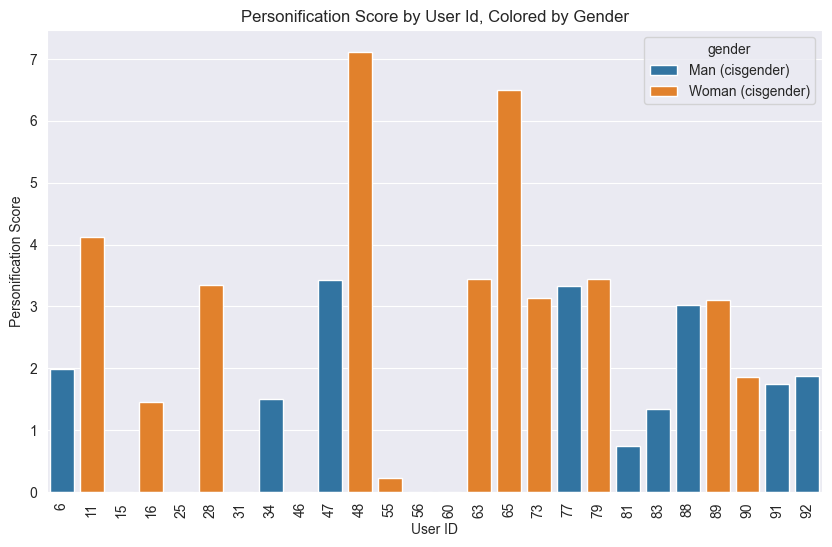

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_scores, x='user_id', y='personification_score', hue='gender', dodge=False)
plt.xlabel('User ID')
plt.ylabel('Personification Score')
plt.title('Personification Score by User Id, Colored by Gender')
plt.xticks(rotation=90)  # Rotate x tick labels if needed plt.legend(title='Gender') plt.tight_layout() plt.show()